# Topic 2 D - LDA on Iris (Multi-class visualization)

**Corresponding script:** `scripts/exercises/lda_iris_ex5.py` (and complements `lda2.py`, `lda3.py`)

## Learning goals
- Apply LDA to a classic 3-class dataset (Iris)
- Visualize the 2D discriminant space (LD1 vs LD2)
- Evaluate classification performance and make a single prediction


In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

## 1) Load Iris

Iris has:
- 150 samples
- 4 features
- 3 classes (setosa, versicolor, virginica)

Because C = 3, LDA can produce up to:

$$
C - 1 = 2
$$

So we can visualize in 2D as (LD1, LD2).


In [16]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

print("X shape:", X.shape)
print("Class counts:", np.bincount(y))

X shape: (150, 4)
Class counts: [50 50 50]


## 2) Train/test split + scaling

We scale features (same reasons as before).


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3) Fit LDA classifier + evaluate

We fit LDA and evaluate on the test set.


In [18]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

y_pred = lda.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print(f"Test accuracy: {acc:.3f}")
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=target_names))

Test accuracy: 0.978

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## 4) Cross-validation (optional but recommended)

For small datasets like Iris, CV gives a better sense of stability.


In [19]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_scores = cross_val_score(lda, scaler.fit_transform(X), y, scoring="accuracy", cv=cv, n_jobs=-1)

print(f"CV accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

CV accuracy: 0.980 ± 0.031


## 5) Visualize the LDA projection (LD1 vs LD2)

We use `transform()` to get LD scores. Each sample becomes a point in 2D.

Interpretation:
- clearer separation between classes in this plot means LDA found discriminative directions.


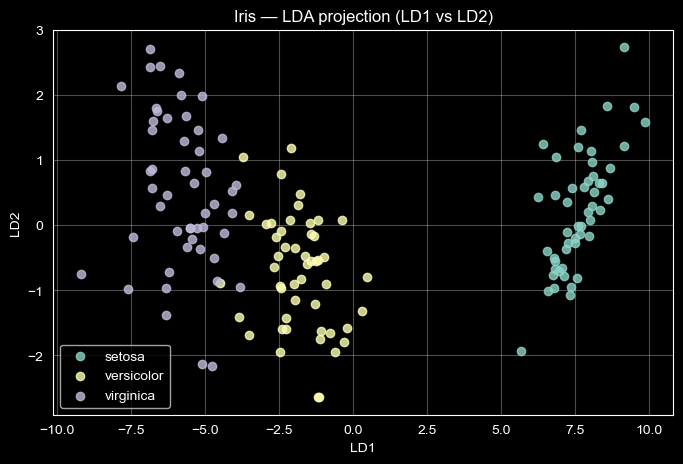

In [20]:
X_all_scaled = scaler.fit_transform(X)
X_lda2 = lda.fit(X_all_scaled, y).transform(X_all_scaled)  # (n_samples, 2)

plt.figure(figsize=(8, 5))
for cls, name in enumerate(target_names):
    mask = (y == cls)
    plt.scatter(X_lda2[mask, 0], X_lda2[mask, 1], alpha=0.8, label=name)

plt.title("Iris — LDA projection (LD1 vs LD2)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6) Predict a new observation

Example from the lecture:
- new = [5, 3, 1, 0.4]

We scale the new row using the same scaler, then predict.


In [21]:
new = [5, 3, 1, 0.4]
new_scaled = scaler.transform([new])
pred = lda.predict(new_scaled)[0]
print("Predicted class:", target_names[pred])

Predicted class: setosa


## ✅ Interpretation of results (Topic 2D — LDA on Iris)

### 1) Dataset context
- **X shape: (150, 4)** → 150 samples, 4 features
- **Class counts: [50, 50, 50]** → perfectly balanced (each class has the same number of samples)

Because the dataset is balanced, **accuracy, precision, recall, and F1** are all informative.

---

### 2) Test-set performance (generalization)
- **Test accuracy: 0.978**

This is very strong for a **linear** model.

From the classification report:
- **setosa**: precision = 1.00, recall = 1.00
  → setosa is essentially linearly separable from the other two classes.
- **versicolor vs virginica**: small overlap
  - versicolor recall = 1.00 (caught all versicolor)
  - virginica recall = 0.93 (a few virginica were misclassified)

This matches the known Iris structure:
setosa is easy; versicolor and virginica are the only pair with meaningful overlap.

---

### 3) Cross-validation stability
- **CV accuracy: 0.980 ± 0.031**

Interpretation:
- average performance is ~98%
- some fold-to-fold variation is expected because Iris is small (each fold has few samples)

CV confirms performance is not due to a lucky single split.

---

### 4) LDA projection plot (LD1 vs LD2)
With **C = 3 classes**, LDA can create at most:

$$
n_{\text{components}} \le C - 1 = 2
$$

So plotting **LD1 vs LD2** shows the full discriminant space.

What we observe:
- **setosa** forms a clearly separated cluster on one side of the plot
- **versicolor** and **virginica** are closer together with mild overlap

This visual separation aligns directly with the high accuracy and the small number of errors.

---

### 5) Single prediction
`Predicted class: setosa` means the new sample lies in the region of the discriminant space closest (in LDA terms) to the setosa class.

---

### ✅ Final takeaway
LDA is an excellent method when classes are approximately separable by linear boundaries.
On Iris, LDA finds a low-dimensional representation (LD1/LD2) that preserves nearly perfect class separation, which is reflected in both the visualization and the ~98% accuracy.
